In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Downloading 

In [20]:
pip install kaggle #download kaggle api

Note: you may need to restart the kernel to use updated packages.


In [24]:
!kaggle competitions download -c playground-series-s4e1 #download dataset

In [28]:
!ls

Kaggle Tabular Data.ipynb  Lab.5
Lab.1                      Lab.6
Lab.2                      Lab.7
Lab.3                      Lab.8
Lab.4                      playground-series-s4e1.zip


In [30]:
!unzip playground-series-s4e1.zip #unzip files

Archive:  playground-series-s4e1.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [32]:
ls -lh

total 56680
-rw-r--r--   1 nghitran  staff    21K Apr 10 20:58 Kaggle Tabular Data.ipynb
drwxr-xr-x   3 nghitran  staff    96B Feb 12 15:05 Lab.1/
drwxr-xr-x   4 nghitran  staff   128B Mar 29 00:10 Lab.2/
drwxr-xr-x   6 nghitran  staff   192B Mar 29 00:10 Lab.3/
drwxr-xr-x   8 nghitran  staff   256B Mar 29 00:10 Lab.4/
drwxr-xr-x   5 nghitran  staff   160B Mar 29 00:10 Lab.5/
drwxr-xr-x   6 nghitran  staff   192B Mar 29 00:10 Lab.6/
drwxr-xr-x  10 nghitran  staff   320B Mar 29 00:22 Lab.7/
drwxr-xr-x   4 nghitran  staff   128B Apr 10 19:43 Lab.8/
-rw-r--r--   1 nghitran  staff   6.8M Dec 31  2023 playground-series-s4e1.zip
-rw-r--r--   1 nghitran  staff   1.2M Dec 31  2023 sample_submission.csv
-rw-r--r--   1 nghitran  staff   7.7M Dec 31  2023 test.csv
-rw-r--r--   1 nghitran  staff    12M Dec 31  2023 train.csv


# Loading n Looking

In [6]:
#load data into pandas dataset
df = pd.read_csv('train.csv')

In [8]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [10]:
#Check to see data size
rows, features = df.shape
print("Rows:", rows, "\nFeatures:", features)

Rows: 165034 
Features: 14


In [12]:
#Drop id, customerid and surname because they're not significant now
df1=df.copy()
df=df.drop(columns=['id','CustomerId','Surname'])


In [14]:
rows, features = df.shape
print("Rows:", rows, "\nFeatures:", features)

Rows: 165034 
Features: 11


In [110]:
from tabulate import tabulate
from IPython.display import display, HTML

#Make a table to display features' details
def feature_summary_table(df):
    summary = []
    
    for col in df.columns:
        col_data = df[col]
        dtype = col_data.dtype #gives feature type
        missing = col_data.isnull().sum()
        dupe=col_data.duplicated().sum()

        # Assign type of feature and select values to display
        if pd.api.types.is_numeric_dtype(dtype):
            ftype = "Numerical"
            values = f"{col_data.min():.2f} – {col_data.max():.2f}"
        else:
            ftype = "Categorical"
            values = sorted(col_data.dropna().unique())

        # Outlier detection (for numerical only)
        if ftype == "Numerical":
            q1 = col_data.quantile(0.25)
            q3 = col_data.quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            outliers = ((col_data < lower) | (col_data > upper)).sum()
        else:
            outliers = "N/A"

        summary.append([col, ftype, values, missing, dupe, outliers])

    #Displaying info via table
    headers = ["Feature", "Type", "Values / Range", "Missing","Duplicated", "Outliers"]
    display(HTML(tabulate(summary, headers=headers, tablefmt="html")))
    return summary


In [112]:
_=feature_summary_table(df)

Feature,Type,Values / Range,Missing,Duplicated,Outliers
CreditScore,Numerical,350.00 – 850.00,0,164577,253
Geography,Categorical,"['France', 'Germany', 'Spain']",0,165031,N/A
Gender,Categorical,"['Female', 'Male']",0,165032,N/A
Age,Numerical,18.00 – 92.00,0,164963,6394
Tenure,Numerical,0.00 – 10.00,0,165023,0
Balance,Numerical,0.00 – 250898.09,0,134959,0
NumOfProducts,Numerical,1.00 – 4.00,0,165030,475
HasCrCard,Numerical,0.00 – 1.00,0,165032,40606
IsActiveMember,Numerical,0.00 – 1.00,0,165032,0
EstimatedSalary,Numerical,11.58 – 199992.48,0,109736,0


* <b> 2 Categorical features will need to be encoded
* <b> Numerical features will need to be scaled/normalized
* <b> No missing values found
* <b> Some outliers found using pure math definition - will analyze further in visualization
* <b> Some duplicates found: for some columns it's expected due to low variation but should still be investigated

# Duplicates

In [12]:
#check for duplicates
df1.duplicated().sum()

0

In [14]:
df2=df1.copy #Make a copy to use later

In [16]:
#dropping just id - no duplicates
df1=df1.drop(columns=['id'])
print("Duplicates after dropping id column:", df1.duplicated().sum())

Duplicates after dropping id column: 0


In [18]:
df1.columns #Check columns in dataset

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [20]:
#Dropping id+ Customerid

df1=df1.drop(columns=['CustomerId'])
print("Duplicates after dropping id and customer id columns:", df1.duplicated().sum())

Duplicates after dropping id and customer id columns: 54


In [22]:
#Visualize the duplicates
df1d=df1[df1.duplicated(keep=False)]
display(df1d.sort_values(by=df1d.columns.tolist()))

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
60181,Barclay-Harvey,513,France,Male,44.0,1,63562.02,2,1.0,1.0,52629.73,0
115924,Barclay-Harvey,513,France,Male,44.0,1,63562.02,2,1.0,1.0,52629.73,0
48622,Black,641,France,Male,33.0,2,0.00,2,1.0,1.0,55796.83,0
119071,Black,641,France,Male,33.0,2,0.00,2,1.0,1.0,55796.83,0
137330,Brennan,765,France,Female,50.0,9,126547.80,1,1.0,1.0,79579.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...
144132,Wright,632,France,Male,50.0,2,0.00,2,1.0,0.0,57942.88,0
20378,Yobachi,449,Spain,Female,33.0,8,0.00,2,1.0,0.0,156792.89,0
21512,Yobachi,449,Spain,Female,33.0,8,0.00,2,1.0,0.0,156792.89,0
30063,Young,606,Germany,Male,27.0,2,130274.26,2,1.0,1.0,147533.09,0


<b> Given that customers with the same surnames have the same salary and balance -- there's a high chance these are true duplicates

In [25]:
#Dropping id + customer id + Surname 
df2=df2.drop(columns=['id','CustomerId','Surname'])
print("Duplicates after dropping id, customerid, and surname columns:", df2.duplicated().sum())

Duplicates after dropping id, customerid, and surname columns: 123


In [27]:
#Visualize the duplicates
df1d=df1[df1.duplicated(keep=False)]
display(df1d.sort_values(by=df1d.columns.tolist()))

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
60181,Barclay-Harvey,513,France,Male,44.0,1,63562.02,2,1.0,1.0,52629.73,0
115924,Barclay-Harvey,513,France,Male,44.0,1,63562.02,2,1.0,1.0,52629.73,0
48622,Black,641,France,Male,33.0,2,0.00,2,1.0,1.0,55796.83,0
119071,Black,641,France,Male,33.0,2,0.00,2,1.0,1.0,55796.83,0
137330,Brennan,765,France,Female,50.0,9,126547.80,1,1.0,1.0,79579.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...
144132,Wright,632,France,Male,50.0,2,0.00,2,1.0,0.0,57942.88,0
20378,Yobachi,449,Spain,Female,33.0,8,0.00,2,1.0,0.0,156792.89,0
21512,Yobachi,449,Spain,Female,33.0,8,0.00,2,1.0,0.0,156792.89,0
30063,Young,606,Germany,Male,27.0,2,130274.26,2,1.0,1.0,147533.09,0


* <b> Lookes like what is happening here could be that customers with different surnames but similar balances are now considered duplicates
* <b> As of right now, I will assume the that 54 duplicates from df1 were genuine duplicates and will drop them

# Target

In [164]:
#Check if target column is binary

total = df['Exited'].count()
unique = df['Exited'].nunique()
values = df['Exited'].unique()

table = [['Total samples', total],
    ['Unique cases', unique],
    ['Unique Values', list(values)]]

display(HTML("<h4>Target Column: Exited </h4>"))
display(HTML(tabulate(table, tablefmt='html')))

Total samples,164911
Unique cases,2
Unique Values,"[0, 1]"


# Class Imbalance

In [16]:
#Check for class imbalance in target column
d=df['Exited'].value_counts()

for i in d.index:
    if i == 0:
        print("Stayed:", d[i])
    else:
        print("Churn:", d[i])

Stayed: 130113
Churn: 34921


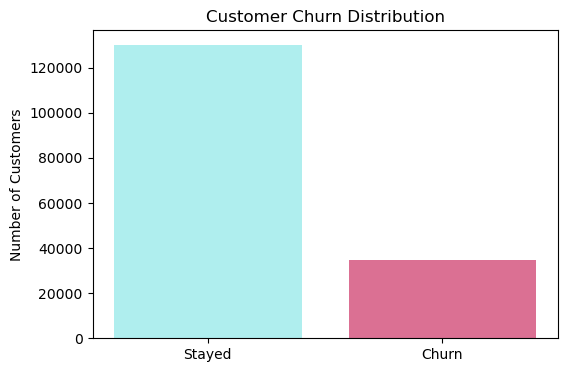

In [32]:
#Bar graph of class imbalance

labels = ['Stayed', 'Churn']
values = [d[0], d[1]]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['paleturquoise', 'palevioletred'])
plt.title("Customer Churn Distribution")
plt.ylabel("Number of Customers")
plt.show()

<b> Target column is encoded into 0 and 1. There is some class imbalance and will need to be taken care of depending on the type of model to be used for training/learning. 